In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (8,5)


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.shape)        
print(df.info())       
print(df.isnull().sum())  


(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
d

The dataset has 891 rows and 12 columns. Types of data are integers ( for Survived and Pclass variable), floats ( for Age, Fare variables) and objects (text fields such as Name and Cabin). The missing value summary reveals that the Age variable has 177 missing cases, Cabin has 687 missing cases and Embarked has two missing cases. This is very important in information required to clean up data prior to modeling.

In [4]:
# Fill Embarked
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Add dummy HasCabin if Cabin column missing
if 'Cabin' in df.columns:
    df['HasCabin'] = df['Cabin'].notnull().astype(int)
    df.drop(columns=['Cabin'], inplace=True)
else:
    df['HasCabin'] = 0

# Impute Age with group median
df['Age'] = df['Age'].fillna(
    df.groupby(['Sex','Pclass'])['Age'].transform('median')
)


Survival rate: 0.3838383838383838


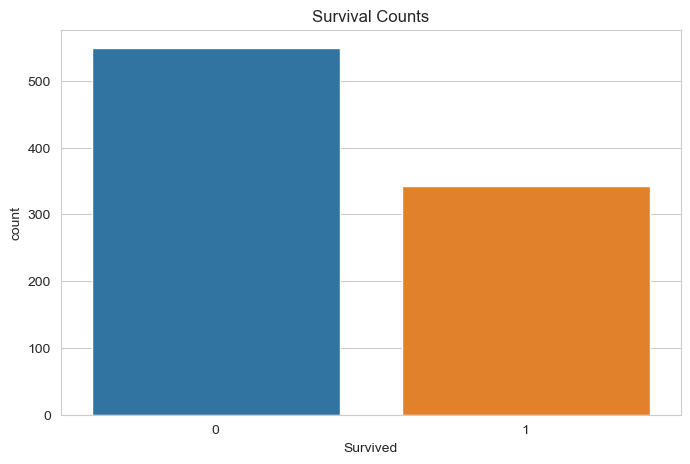

In [5]:
# Overall survival rate
print("Survival rate:", df['Survived'].mean())

# Countplot
sns.countplot(x='Survived', data=df)
plt.title("Survival Counts")
plt.show()


The survival rate is 0.383838 it means that in the the whole dataset ony 38% were survived and other 62% did not.


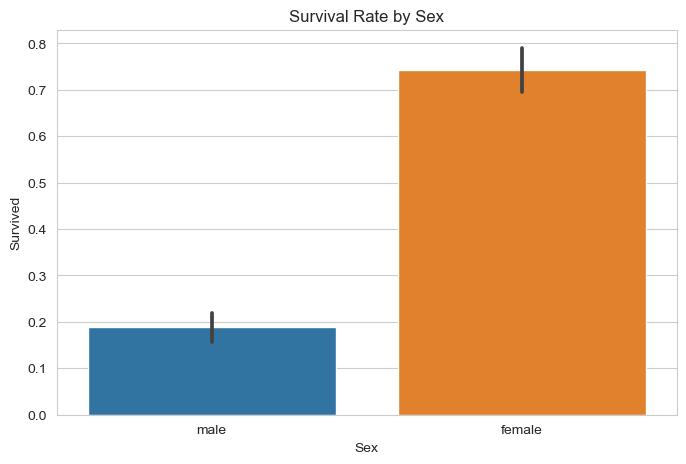

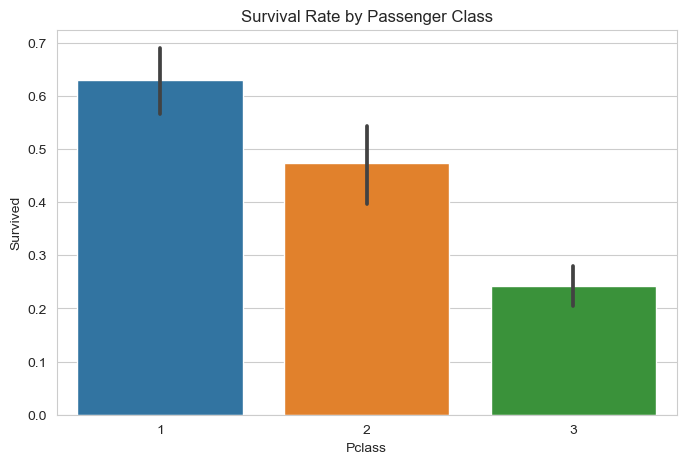

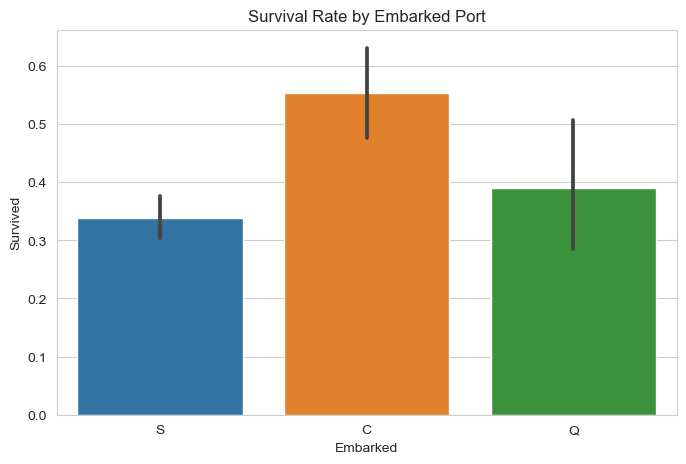

In [6]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()


The graph Survival rate by sex indicates survival by sex, the chart indicates clearly that women were much more likely to survive than men. The male bar has a significantly smaller survival rate and the error bar also represents the size of uncertainty.

The survival rate by passenger class; the chart, reveals that the rate of survival is higher in first-class passengers than in third-class passengers. using the chart by passenger class, first-class passengers have a higher survival rate with a short error bar means that the estimate is accurate. The survival of passengers in the third classes is less, and the error bars demonstrate the uncertainty range.

The survival of passengers that were on board in Cherbourg was the highest and lowest was at Southampton. Southampton has a small error bar because it has the most number of passengers and thus the estimate is more valid. Queenstown has the most passengers with the least error bar indicating that the estimate of the survival rate is less precise.


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


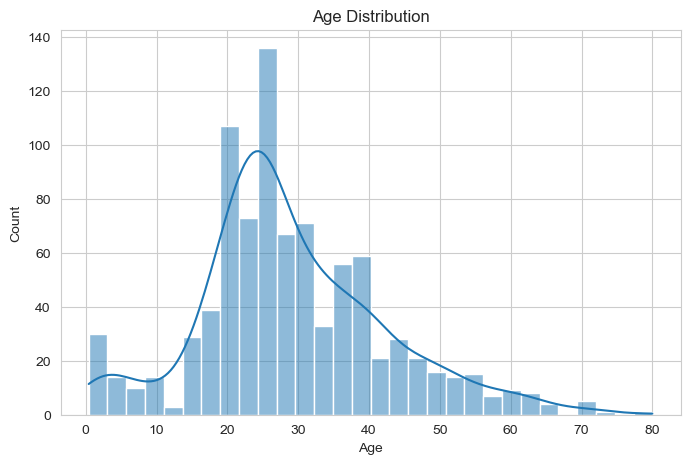

In [12]:
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

The graph of the age distribution indicates the distribution of ages of the passengers in the dataset. The majority of the passengers were aged between 20 and 40 years with less children and elderly passengers. The age chart indicates a better survival probability of children below the age of 10 years and most of the passengers in the category of 20-40 years did not survive. Ages 40 to 60 were found to have low survival rates and there was little survival of older passengers who were above 60 years. This entails that age had a significant role in survival as children under age had higher chances of surviving compared to adults.


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


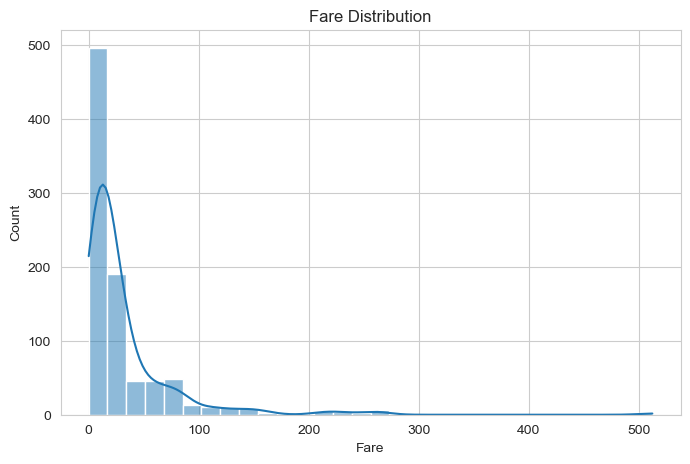

In [13]:
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title("Fare Distribution")
plt.show()

The fare chart indicates the amount that the passengers charged on their tickets. The majority of passengers had low fares and only a few had very high fares. It informs us that most individuals in the Titanic were traveling in the lower fare classes, with just a few customers paying a high price.

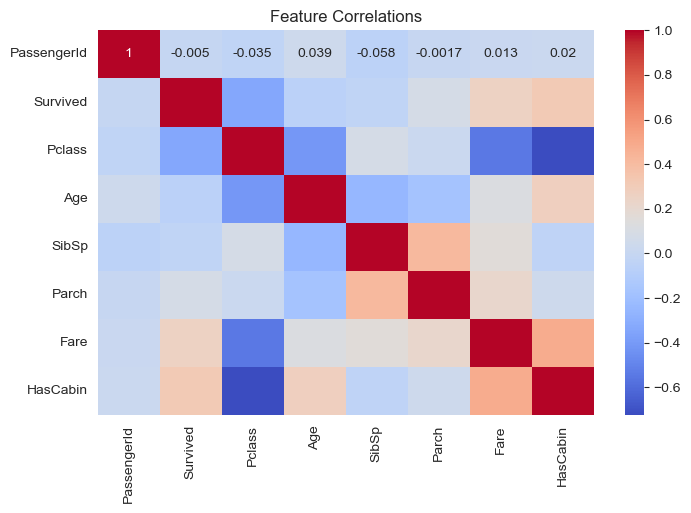

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()


The feature correlation chart indicates the relationship among the numeric characteristics of the Titanic passengers. A good connection that exists is between fare and passenger class. Passenger class and survival are also connected clearly. There is a positive correlation between fare and survival as well, that is, passengers with high fares were more likely to survive. Only age and survival have a weak association.  Passenger ID has no relation, as it is a mere label. 

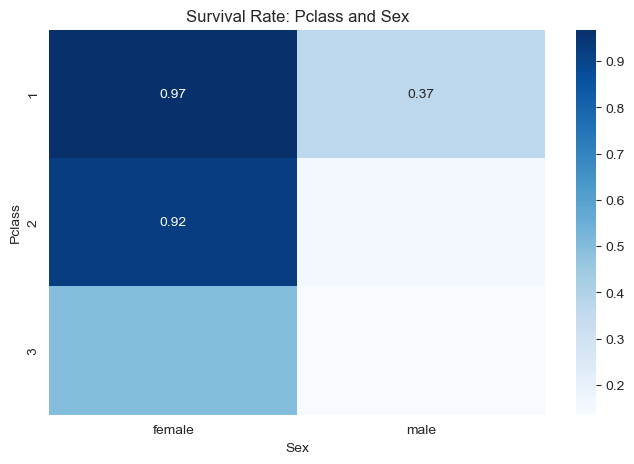

In [14]:
pivot = df.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='Blues')
plt.title("Survival Rate: Pclass and Sex")
plt.show()


This graph indicates how the survival required the passenger class and sex. All classes had much higher chances of survival amongst women than men. Men in the first class had a higher survival rate than men in second and third classes, which indicated that wealth and the type of ticket affected the survival of men.

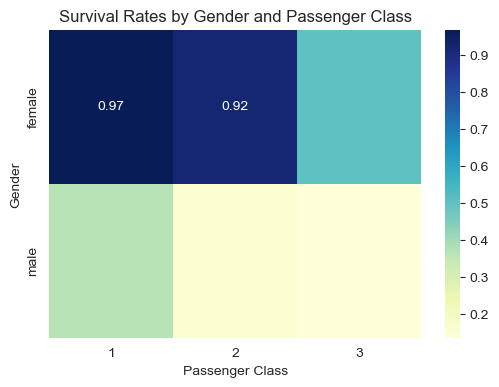

In [10]:
# Pivot table for survival rates
survival_pivot = df.pivot_table(
    values="Survived",
    index="Sex",
    columns="Pclass",
    aggfunc="mean"
)

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(survival_pivot, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Survival Rates by Gender and Passenger Class")
plt.ylabel("Gender")
plt.xlabel("Passenger Class")
plt.show()


In this diagram the survival of men and women is compared with classes. First and second class women survived close to 100 percent, and third-class women survived in smaller numbers. Men had very low survival in all classes, even though the survival in first and third was a little better. This brings out the impact of the two together on survival, namely, class and gender.

### Correlation heatmap of features and survival 

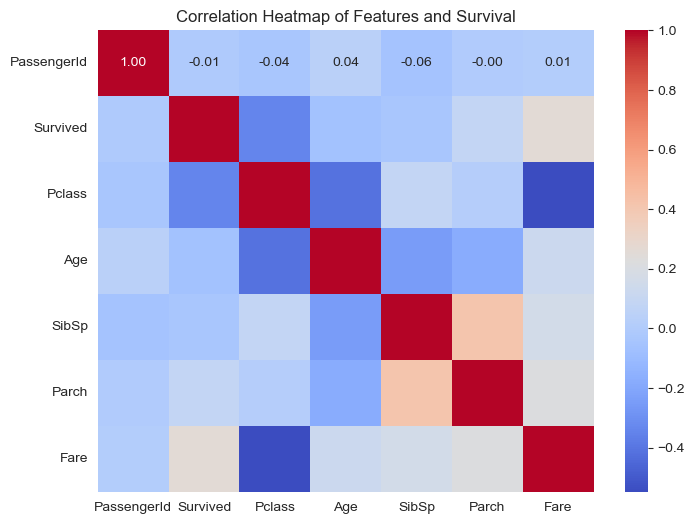

In [11]:
# Select numeric columns plus 'Survived'
numeric_cols = df.select_dtypes(include=["int64","float64"])
corr = numeric_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features and Survival")
plt.show()
